# Ferry data exploration

In this notebook I will test the ferry data download and QC functions and plot the data to see how it is looking

All the data is stored in an xarray dataset

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ferry_data_utils import ferry_data_QC
from ferry_data_utils import ferry_data_download

Try Salish ferry first

In [3]:
URL1='http://107.170.217.21:8080/thredds/dodsC/Salish_L1_STA/Salish_L1_STA.ncml'

In [4]:
ferry=ferry_data_download(URL1)

## The following takes a long time, be patient

In [5]:
ferryQC=ferry_data_QC(ferry,6.5,4,4)

/Users/Maru/miniconda3/lib/python3.5/site-packages/xarray/core/variable.py:1046: RuntimeWarning: invalid value encountered in less
  if not reflexive


In [6]:
ferryQC

<xarray.Dataset>
Dimensions:                             (depth: 56, time: 993110)
Coordinates:
  * depth                               (depth) float32 12.05 14.05 16.05 ...
  * time                                (time) datetime64[ns] 2014-05-14T21:04:17 ...
Data variables:
    latitude                            (time) float64 ...
    longitude                           (time) float64 ...
    ensemble_number                     (time) float64 ...
    speed_made_good                     (time) float64 ...
    direction_made_good                 (time) float64 ...
    heading                             (time) float64 ...
    pitch                               (time) float64 ...
    roll                                (time) float64 ...
    pstide_prediction_mllw              (time) float64 ...
    psdem_bathymetry_navd88             (time) float64 ...
    vdatum_offset_mllw_to_navd88        (time) float64 ...
    bottom_tracking_depth_beam_1        (time) float64 ...
    bottom_track

In [7]:
ferryQC.Horizontal_speed.max()

<xarray.DataArray 'Horizontal_speed' ()>
array(3.9999882163792186)

In [39]:
ferryQC.time

<xarray.DataArray 'time' (time: 993110)>
array(['2014-05-14T21:04:17.000000000', '2014-05-14T21:04:31.500000000',
       '2014-05-14T21:04:46.000000000', ...,
       '2016-11-21T05:36:04.500000000', '2016-11-21T05:36:21.000000000',
       '2016-11-21T05:36:36.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2014-05-14T21:04:17 ...
Attributes:
    long_name: Time (UTC) as Seconds Since 2014-01-01 00:00:00
    standard_name: time
    time_zone: UTC

### Pick a time in which you want to see the ferry data
This will slice the entire data set to the selected time

In [49]:
data_A2016=ferryQC.sel(time=slice('2016-11-01T18:00:00', '2016-11-01T20:00:00'))

In [50]:
data_A2016.Horizontal_speed

<xarray.DataArray 'Horizontal_speed' (time: 284, depth: 56)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * depth    (depth) float32 12.05 14.05 16.05 18.05 20.05 22.05 24.05 26.05 ...
  * time     (time) datetime64[ns] 2016-11-01T18:03:33 2016-11-01T18:03:48 ...

### Plot the horizontal speed:

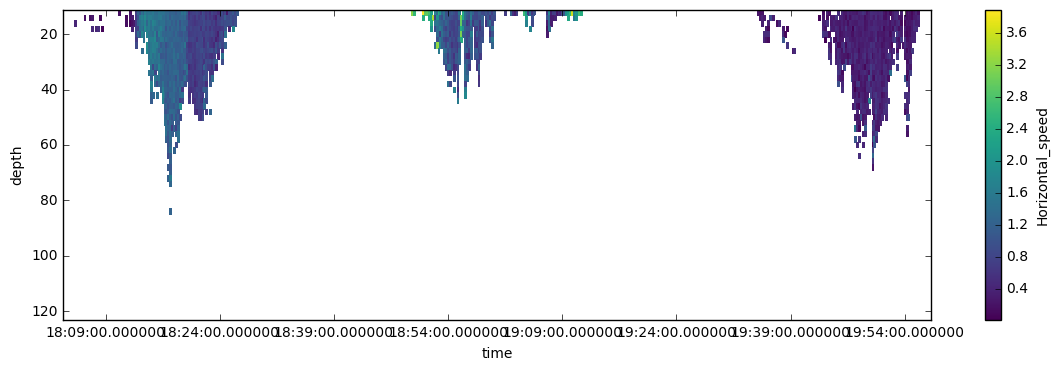

In [51]:
%matplotlib inline
plt.figure(figsize=(14,4))
data_A2016.Horizontal_speed.plot(x='time', y='depth')
plt.gca().invert_yaxis()

### We can select a depth and a latitude and longitude area and then plot time series